In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style(style='darkgrid')

In [2]:
df_test = pd.read_csv("https://github.com/dsindy/kaggle-titanic/blob/master/data/test.csv?raw=true")

In [3]:
df_train = pd.read_csv("https://github.com/dsindy/kaggle-titanic/blob/master/data/train.csv?raw=true")

In [4]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train = df_train.set_index('PassengerId')

In [6]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
df_train.isna()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


<AxesSubplot:ylabel='PassengerId'>

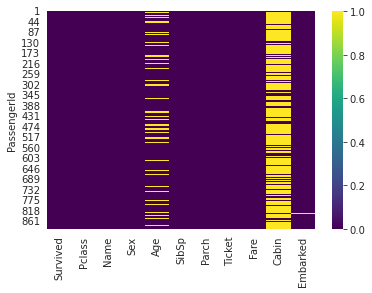

In [10]:
sns.heatmap(df_train.isna(), cmap='viridis')

## Sigmoid function

In [11]:
x = np.arange(-100, 100, 1)
y = 1/(1+np.exp(-x))

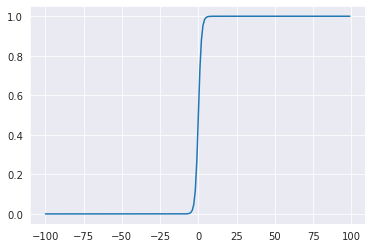

In [12]:
plt.plot(x, y)
plt.show()

## Metrics for classification problem

|                   | Predicted Covid+ | Predicted Covid- |
|-------------------|---------------|-------------------|
| **Actual Covid+**    | TP            | FN                |
| **Actual Covid-**| FP            | TN                |

| Total = 10       | Predicted Covid+ | Predicted Covid- |
|-------------------|---------------|-------------------|
| **Actual Covid+** | 5            | 1                |
| **Actual Covid-** | 1            | 3                |

$Accuracy = \frac{TP + TN}{\text{Total Instances}}$ = (Total cases correctly tested)

$Recall = \frac{TP}{TP + FN}$ = (How many of the actual positive cases have been tested correctly)

$Precision = \frac{TP}{TP + FP}$ = (Out of the reported positive cases, how many of them are actually Covid+)

## Exploratory Data Analysis

<AxesSubplot:ylabel='PassengerId'>

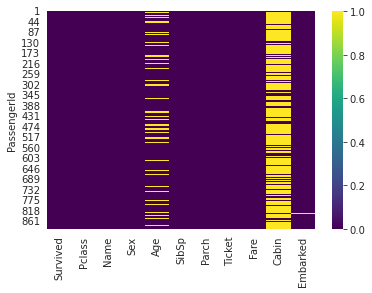

In [13]:
sns.heatmap(df_train.isnull(), cmap='viridis')

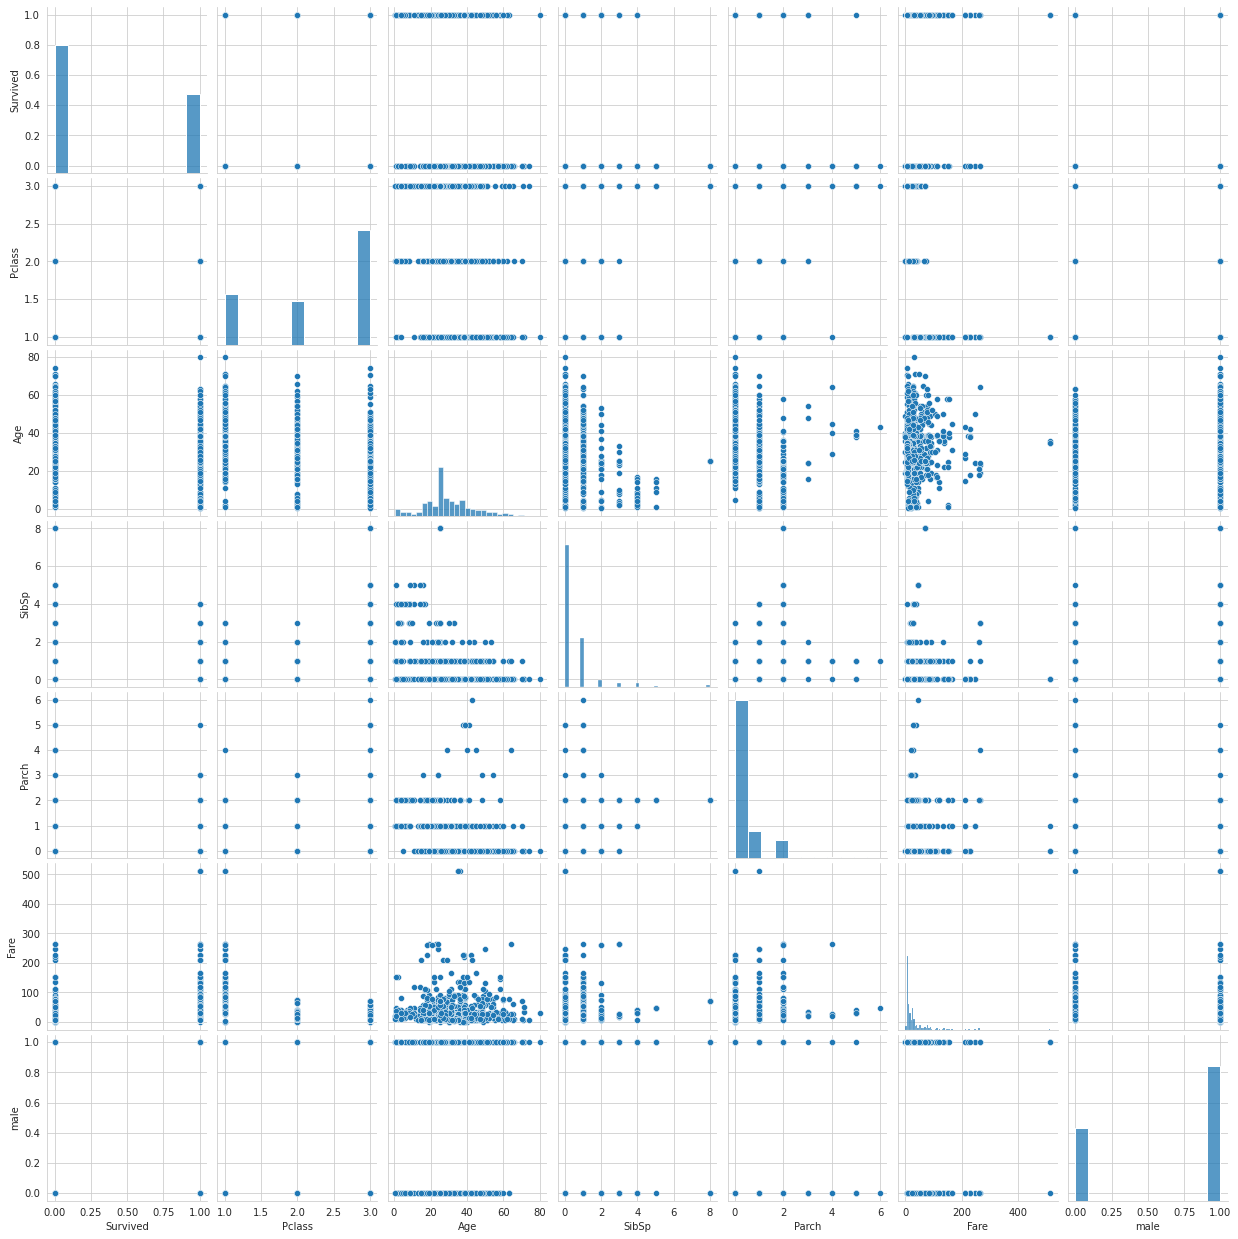

In [132]:
sns.pairplot(df_train)

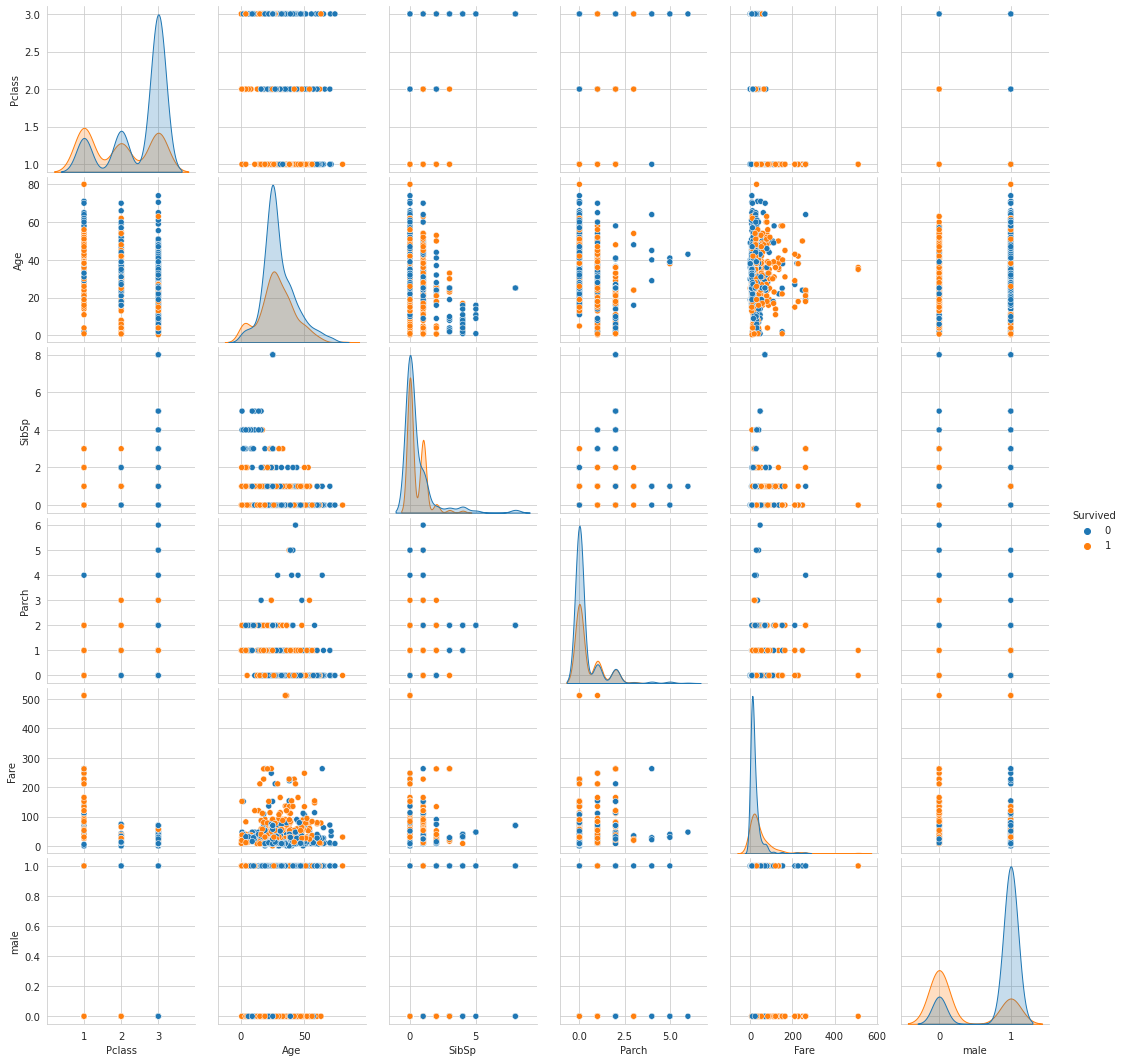

In [131]:
sns.pairplot(df_train, hue='Survived')

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [16]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

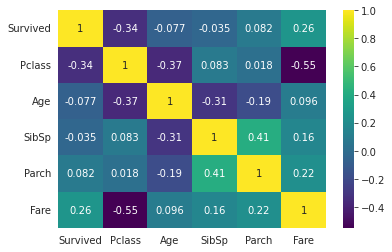

In [17]:
cor = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1).corr()
sns.heatmap(cor, cmap='viridis', annot=True)

<AxesSubplot:xlabel='Survived', ylabel='Count'>

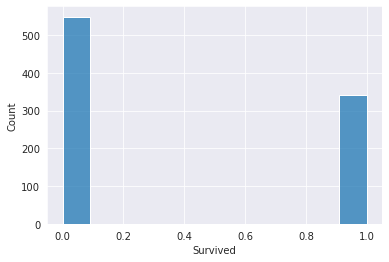

In [18]:
sns.histplot(data=df_train, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

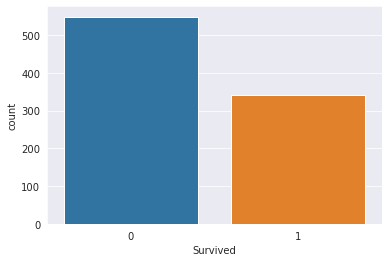

In [19]:
sns.countplot(data=df_train, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

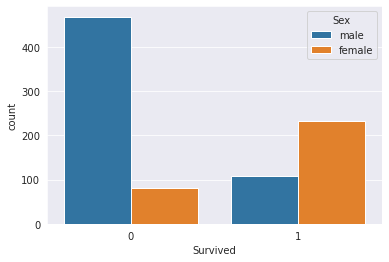

In [20]:
sns.countplot(data=df_train, x='Survived', hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

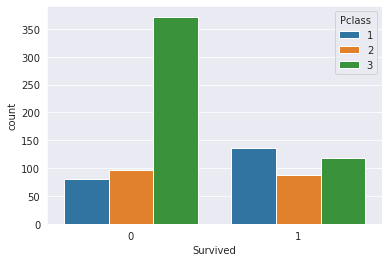

In [21]:
sns.countplot(data=df_train, x='Survived', hue='Pclass')

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

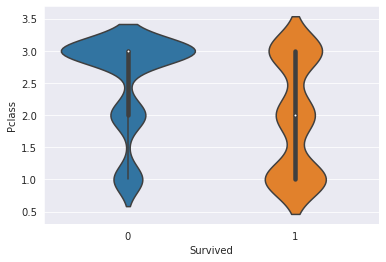

In [22]:
sns.violinplot(data=df_train, x='Survived', y='Pclass')

<AxesSubplot:ylabel='Age'>

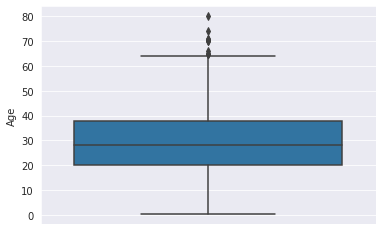

In [23]:
sns.boxplot(data=df_train, y='Age')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

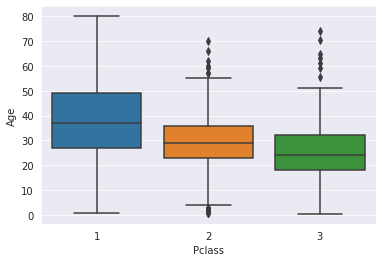

In [24]:
sns.boxplot(data=df_train, x='Pclass', y='Age')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

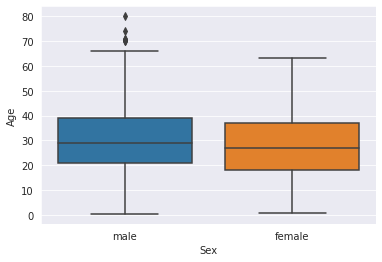

In [25]:
sns.boxplot(data=df_train, x='Sex', y='Age')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

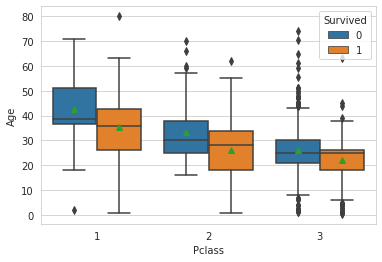

In [139]:
sns.boxplot(data=df_train, x='Pclass', y='Age', hue='Survived', showmeans=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

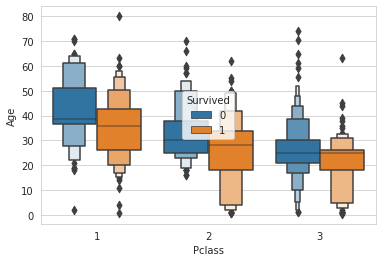

In [133]:
sns.boxenplot(data=df_train, x='Pclass', y='Age', hue='Survived')

In [27]:
df_train.groupby(by='Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [28]:
df_train.groupby(by='Pclass')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


In [29]:
df_train.groupby(by='Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived'>

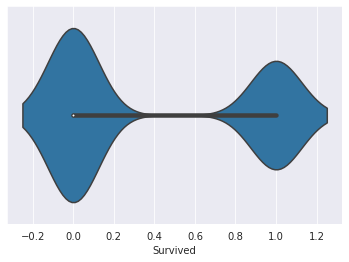

In [30]:
sns.violinplot(data=df_train, x='Survived', hue='Pclass')

<AxesSubplot:xlabel='Survived'>

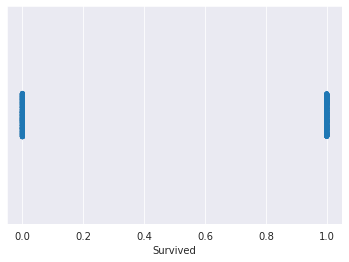

In [31]:
sns.stripplot(data=df_train, x='Survived', hue='Pclass')

In [32]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Count'>

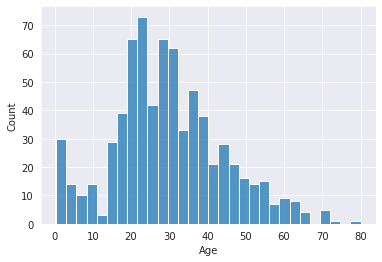

In [33]:
sns.histplot(data=df_train, x='Age', bins=30)

<AxesSubplot:xlabel='Age', ylabel='Count'>

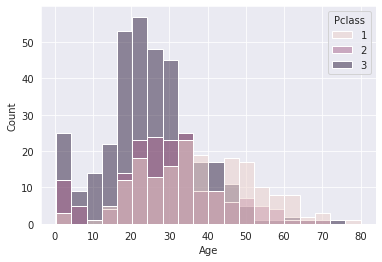

In [34]:
sns.histplot(data=df_train, x='Age', hue='Pclass')

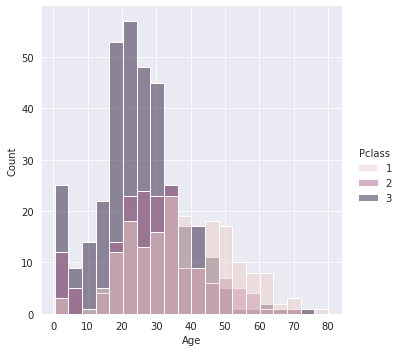

In [35]:
sns.displot(data=df_train, x='Age', hue='Pclass')

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

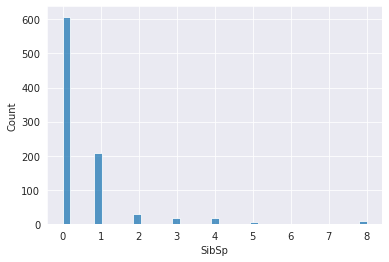

In [36]:
sns.histplot(data=df_train, x='SibSp')

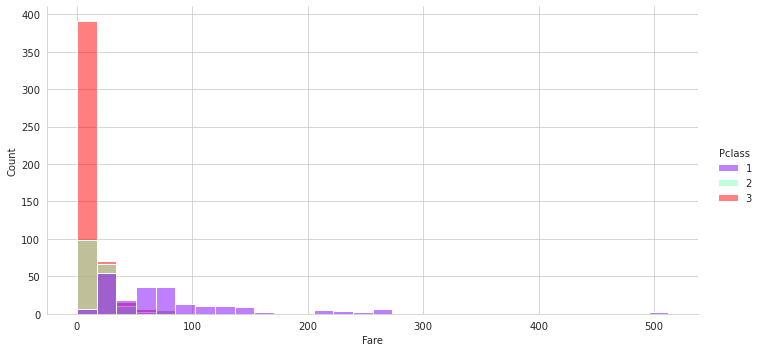

In [37]:
sns.set_style(style='whitegrid')
# plt.figure(figsize=(2, 3))
sns.displot(data=df_train, x='Fare', hue='Pclass', aspect=2, palette='rainbow', bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

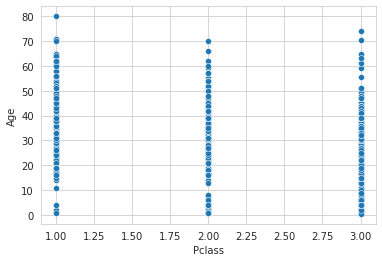

In [38]:
sns.scatterplot(data=df_train, x='Pclass', y='Age')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

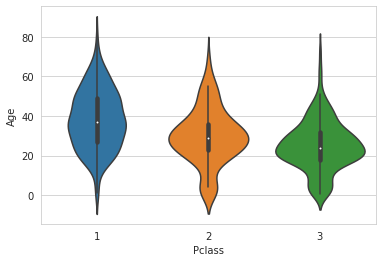

In [39]:
sns.violinplot(data=df_train, x='Pclass', y='Age')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

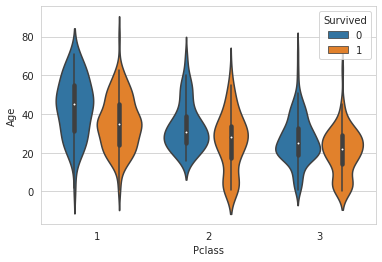

In [40]:
sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

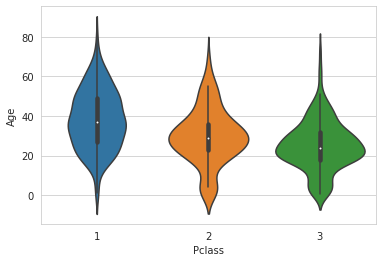

In [41]:
sns.violinplot(data=df_train, x='Pclass', y='Age')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

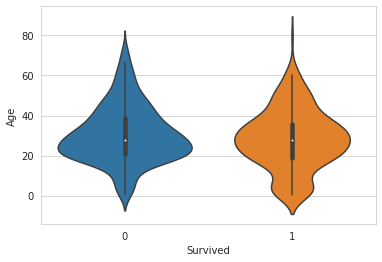

In [42]:
sns.violinplot(data=df_train, x='Survived', y='Age')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

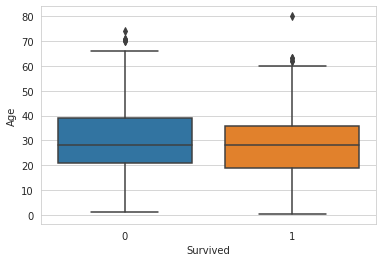

In [43]:
sns.boxplot(data=df_train, x='Survived', y='Age')

<AxesSubplot:ylabel='PassengerId'>

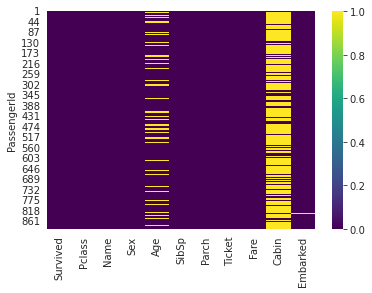

In [44]:
sns.heatmap(df_train.isna(), cmap='viridis')

In [45]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [46]:
df_train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [47]:
df_train['Age'][df_train['Pclass']==2].mean()

29.87763005780347

In [48]:
df_train['Age'][df_train['Pclass']==1].mean()

38.233440860215055

In [49]:
df_train['Age'][df_train['Pclass']==3].mean()

25.14061971830986

In [50]:
pd.DataFrame(df_train.groupby('Pclass')['Age'].mean())

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [51]:
df_train['Age'] = df_train.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

In [52]:
df_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:ylabel='PassengerId'>

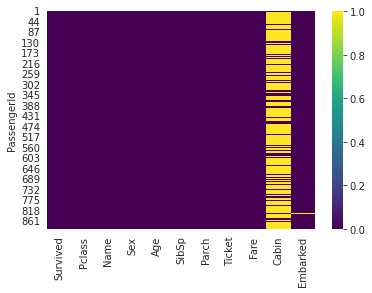

In [53]:
sns.heatmap(df_train.isna(), cmap='viridis')

In [54]:
df_train.drop('Cabin', inplace=True, axis=1)

In [55]:
df_train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [56]:
df_train.dropna(inplace=True, axis=0)

In [57]:
df_train.isna().shape

(889, 10)

In [58]:
df_train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [59]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

## Categorical to Dummy/Indicator variable

In [60]:
df_train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
865,0,2,"Gill, Mr. John William",male,24.00000,0,0,233866,13.0000,S
845,0,3,"Culumovic, Mr. Jeso",male,17.00000,0,0,315090,8.6625,S
567,0,3,"Stoytcheff, Mr. Ilia",male,19.00000,0,0,349205,7.8958,S
585,0,3,"Paulner, Mr. Uscher",male,25.14062,0,0,3411,8.7125,C
59,1,2,"West, Miss. Constance Mirium",female,5.00000,1,2,C.A. 34651,27.7500,S
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00000,2,2,PC 17608,262.3750,C
730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.00000,1,0,STON/O2. 3101271,7.9250,S
308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.00000,1,0,PC 17758,108.9000,C
699,0,1,"Thayer, Mr. John Borland",male,49.00000,1,1,17421,110.8833,C


In [61]:
gender = pd.get_dummies(data=df_train['Sex'], drop_first=True)

In [62]:
gender

,male
PassengerId,
1,1
2,0
3,0
4,0
5,1
...,...
887,1
888,0
889,0


In [63]:
Embarked_ = pd.get_dummies(data=df_train['Embarked'], drop_first=False)
Embarked_

,C,Q,S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
887,0,0,1
888,0,0,1
889,0,0,1


In [64]:
Pclasses = pd.get_dummies(data=df_train['Pclass'], drop_first=False)
Pclasses

,1,2,3
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,1
...,...,...,...
887,0,1,0
888,1,0,0
889,0,0,1


In [65]:
df_train = pd.concat([df_train, gender], axis=1)

In [66]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,0
5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,0


In [67]:
df_train_2 = df_train.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis=1)

In [68]:
df_train_2.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,male
PassengerId,,,,,,,
1,0,3,22.00000,1,0,7.2500,1
2,1,1,38.00000,1,0,71.2833,0
3,1,3,26.00000,0,0,7.9250,0
4,1,1,35.00000,1,0,53.1000,0
5,0,3,35.00000,0,0,8.0500,1
6,0,3,25.14062,0,0,8.4583,1
7,0,1,54.00000,0,0,51.8625,1
8,0,3,2.00000,3,1,21.0750,1
9,1,3,27.00000,0,2,11.1333,0


## Logistic regression

### Training

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
X = df_train_2.drop('Survived', axis=1)
y = df_train_2['Survived']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [222]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')

In [223]:
X_train.shape

(595, 6)

In [224]:
X_test.shape

(294, 6)

In [225]:
from sklearn.linear_model import LogisticRegression

In [226]:
lr = LogisticRegression()

In [227]:
lr.fit(X_train, y_train)

LogisticRegression()

In [228]:
y_train_pred = lr.predict(X_train)

In [229]:
y_pred = lr.predict(X_test)

In [230]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [231]:
from sklearn.metrics import confusion_matrix, classification_report

In [232]:
confusion_matrix(y_train, y_train_pred)

array([[317,  48],
       [ 74, 156]])

In [233]:
pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.810742,0.764706,0.794958,0.787724,0.792946
recall,0.868493,0.678261,0.794958,0.773377,0.794958
f1-score,0.838624,0.718894,0.794958,0.778759,0.792342
support,365.000000,230.000000,0.794958,595.000000,595.000000


### Testing

In [234]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.854054,0.761468,0.819728,0.807761,0.819413
recall,0.858696,0.754545,0.819728,0.806621,0.819728
f1-score,0.856369,0.757991,0.819728,0.807180,0.819561
support,184.000000,110.000000,0.819728,294.000000,294.000000


In [235]:
confusion_matrix(y_train, y_train_pred)

array([[317,  48],
       [ 74, 156]])

In [236]:
confusion_matrix(y_test, y_pred)

array([[158,  26],
       [ 27,  83]])

## Decision Trees

### Training

In [237]:
from sklearn.tree import DecisionTreeClassifier

In [238]:
dtree = DecisionTreeClassifier()

In [239]:
dtree.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

In [240]:
y_train_pred_dtree = dtree.predict(X_train)

In [241]:
confusion_matrix(y_train, y_train_pred_dtree)

array([[364,   1],
       [  5, 225]])

In [242]:
pd.DataFrame(classification_report(y_train, y_train_pred_dtree, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.986450,0.995575,0.989916,0.991013,0.989977
recall,0.997260,0.978261,0.989916,0.987761,0.989916
f1-score,0.991826,0.986842,0.989916,0.989334,0.989899
support,365.000000,230.000000,0.989916,595.000000,595.000000


### Visualizing Trees

In [243]:
from sklearn import tree
text_representation = tree.export_text(dtree)

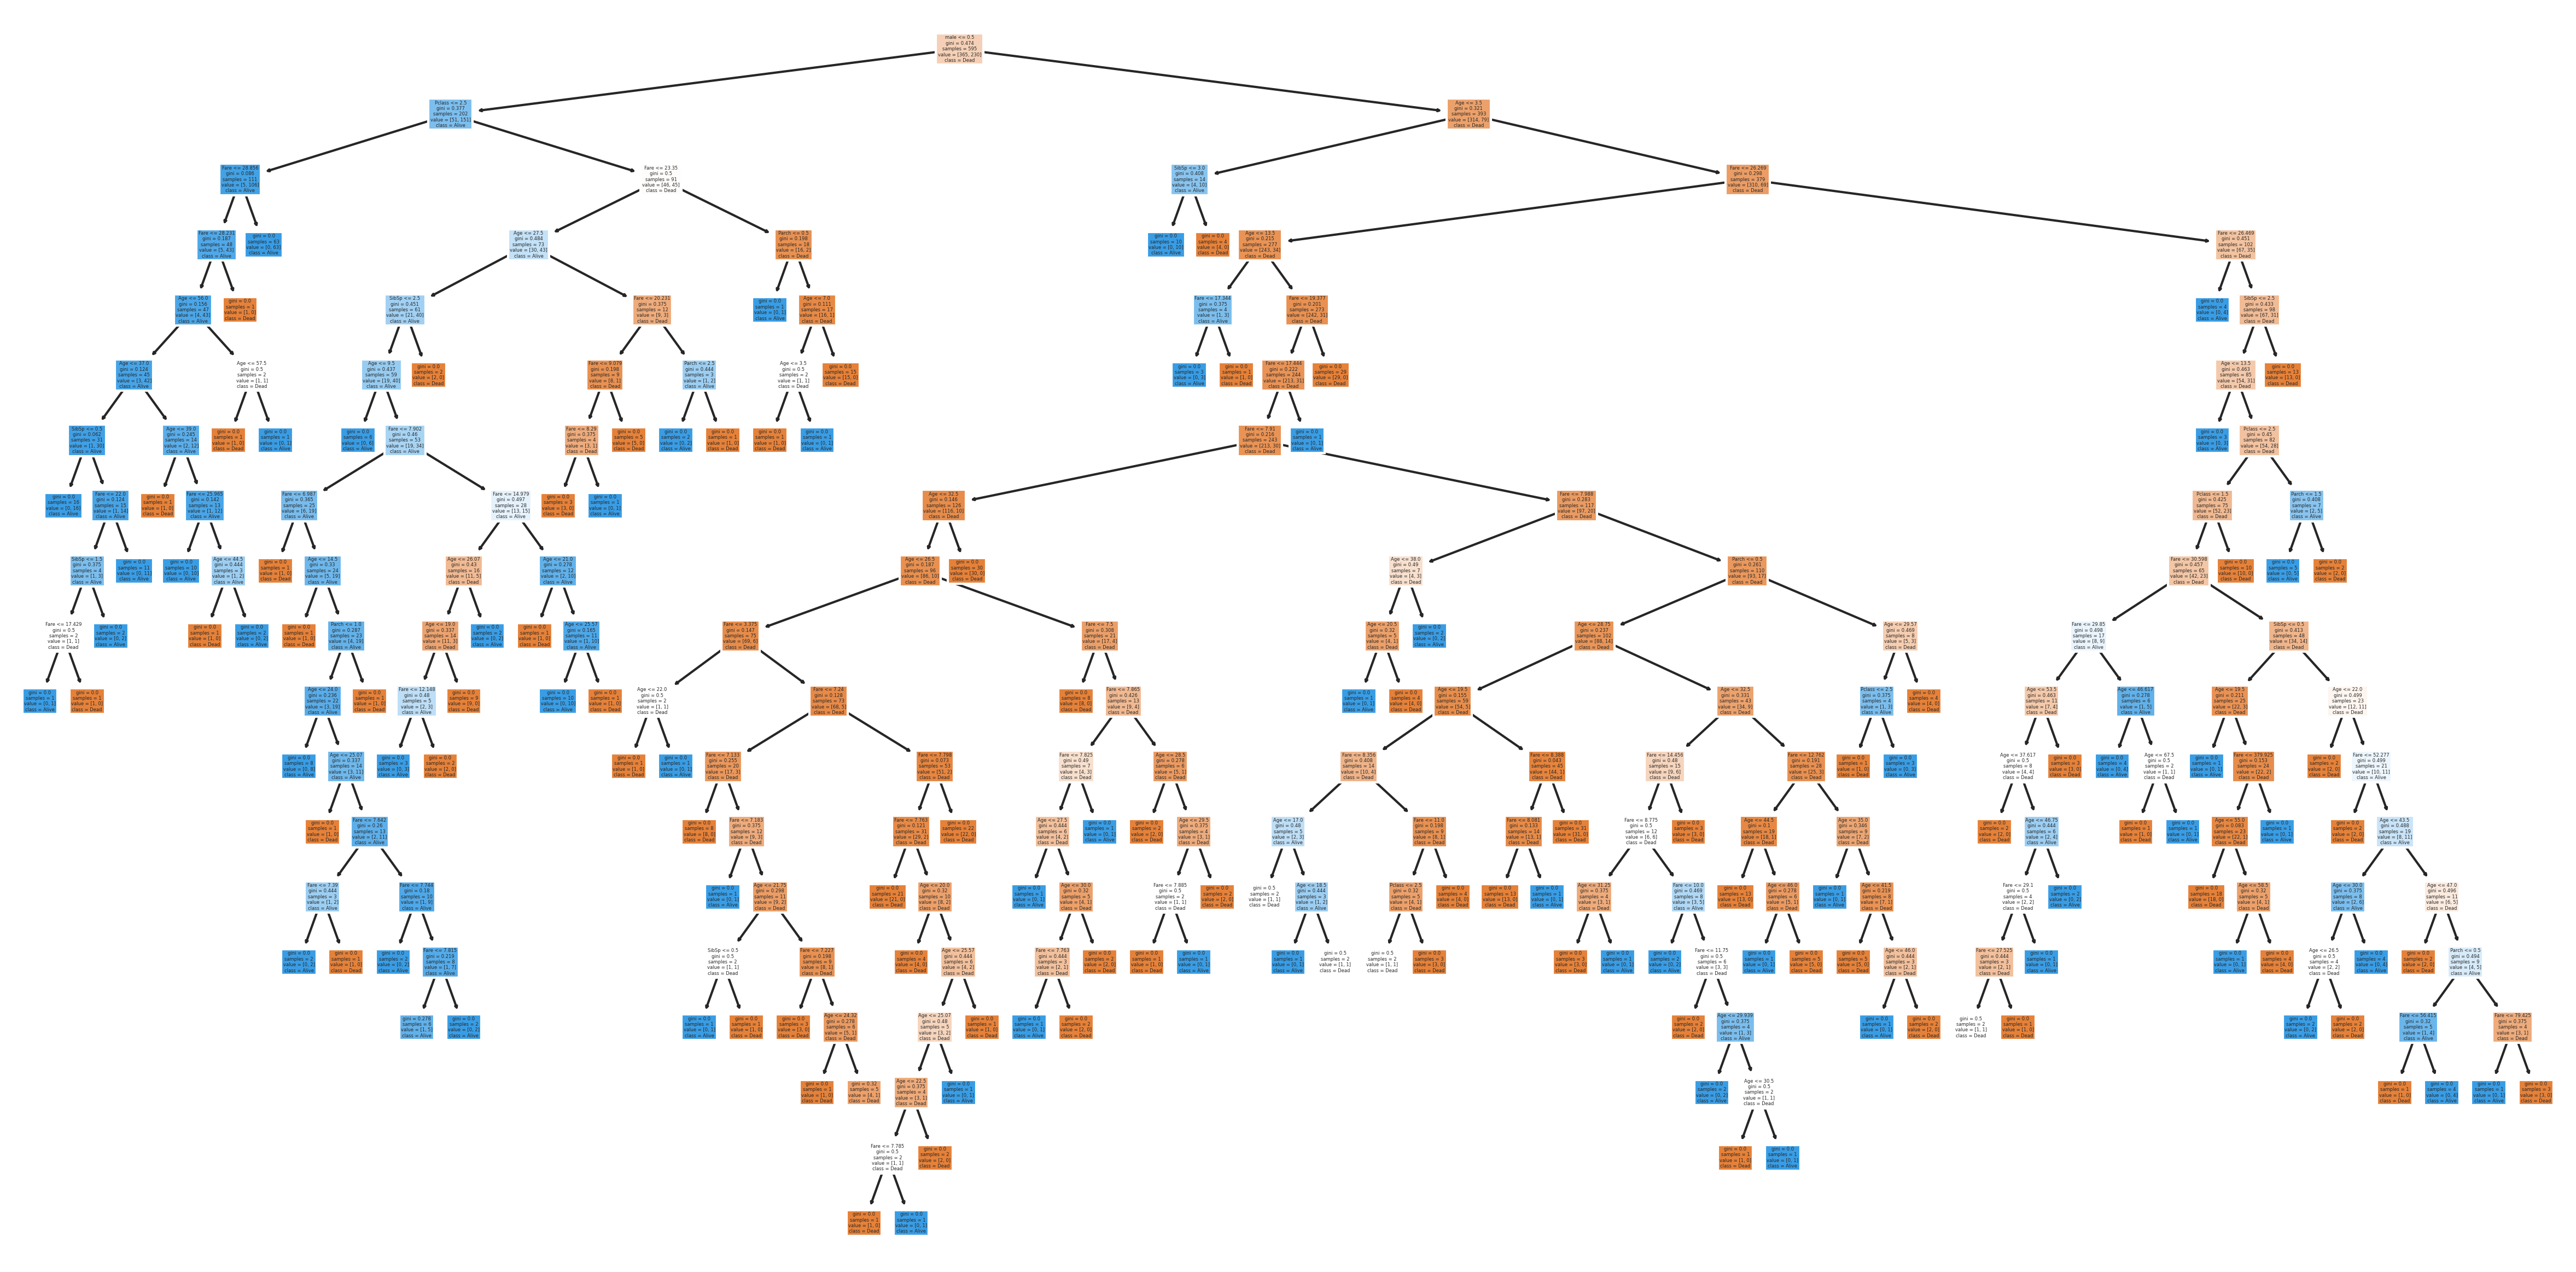

In [244]:
fig = plt.figure(figsize=(20,10), dpi=300)
tree_plot = tree.plot_tree(dtree, max_depth=None, feature_names=X_train.columns, filled=True, class_names=['Dead', 'Alive'])

In [245]:
fig.savefig("decistion_tree.png", dpi=300)

### Testing

In [246]:
y_test_pred_dtree = dtree.predict(X_test)

In [247]:
confusion_matrix(y_test, y_test_pred_dtree)

array([[150,  34],
       [ 36,  74]])

In [248]:
pd.DataFrame(classification_report(y_test, y_test_pred_dtree, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.806452,0.685185,0.761905,0.745818,0.761080
recall,0.815217,0.672727,0.761905,0.743972,0.761905
f1-score,0.810811,0.678899,0.761905,0.744855,0.761456
support,184.000000,110.000000,0.761905,294.000000,294.000000


## Random forest

Bagging = Bootstrapping + Aggregating


n_features = sqrt(total features)

### Training

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
rfc = RandomForestClassifier()

In [251]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [252]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [253]:
y_train_pred_rfc = rfc.predict(X_train)

In [254]:
confusion_matrix(y_train, y_train_pred_rfc)

array([[362,   3],
       [  3, 227]])

In [255]:
pd.DataFrame(classification_report(y_train, y_train_pred_rfc, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.991781,0.986957,0.989916,0.989369,0.989916
recall,0.991781,0.986957,0.989916,0.989369,0.989916
f1-score,0.991781,0.986957,0.989916,0.989369,0.989916
support,365.000000,230.000000,0.989916,595.000000,595.000000


In [256]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [257]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [258]:
y_train_pred_rfc = rfc.predict(X_train)

### Testing

In [259]:
y_test_pred_rfc = rfc.predict(X_test)

In [260]:
confusion_matrix(y_test, y_test_pred_rfc)

array([[152,  32],
       [ 31,  79]])

In [261]:
pd.DataFrame(classification_report(y_test, y_test_pred_rfc, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.830601,0.711712,0.785714,0.771156,0.786119
recall,0.826087,0.718182,0.785714,0.772134,0.785714
f1-score,0.828338,0.714932,0.785714,0.771635,0.785907
support,184.000000,110.000000,0.785714,294.000000,294.000000


In [262]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male
PassengerId,,,,,,
7,1,54.00000,0,0,51.8625,1
577,2,34.00000,0,0,13.0000,0
446,1,4.00000,0,2,81.8583,1
75,3,32.00000,0,0,56.4958,1
671,2,40.00000,1,1,39.0000,0
...,...,...,...,...,...,...
108,3,25.14062,0,0,7.7750,1
272,3,25.00000,0,0,0.0000,1
863,1,48.00000,0,0,25.9292,0


### Hyperparameter optimization (GridSearchCV)

In [263]:
list(range(4, 16, 2))

[4, 6, 8, 10, 12, 14]

In [264]:
from sklearn.model_selection import GridSearchCV

In [265]:
from sklearn.model_selection import GridSearchCV
forest_params = [{'max_depth': list(range(4, 16, 2)), 'max_features': list(range(1, 6))}]
rf_grid = GridSearchCV(rfc, param_grid=forest_params, cv = 5, scoring='accuracy', verbose=2)

### Training

In [266]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ........................max_depth=4, max_features=1; total time=   0.2s
[CV] END ........................max_depth=4, max_features=1; total time=   0.2s
[CV] END ........................max_depth=4, max_features=1; total time=   0.2s
[CV] END ........................max_depth=4, max_features=1; total time=   0.3s
[CV] END ........................max_depth=4, max_features=1; total time=   0.3s
[CV] END ........................max_depth=4, max_features=2; total time=   0.2s
[CV] END ........................max_depth=4, max_features=2; total time=   0.2s
[CV] END ........................max_depth=4, max_features=2; total time=   0.2s
[CV] END ........................max_depth=4, max_features=2; total time=   0.3s
[CV] END ........................max_depth=4, max_features=2; total time=   0.2s
[CV] END ........................max_depth=4, max_features=3; total time=   0.2s
[CV] END ........................max_depth=4, m

[CV] END .......................max_depth=12, max_features=1; total time=   0.4s
[CV] END .......................max_depth=12, max_features=1; total time=   0.4s
[CV] END .......................max_depth=12, max_features=1; total time=   0.4s
[CV] END .......................max_depth=12, max_features=1; total time=   0.4s
[CV] END .......................max_depth=12, max_features=2; total time=   0.4s
[CV] END .......................max_depth=12, max_features=2; total time=   0.4s
[CV] END .......................max_depth=12, max_features=2; total time=   0.4s
[CV] END .......................max_depth=12, max_features=2; total time=   0.4s
[CV] END .......................max_depth=12, max_features=2; total time=   0.3s
[CV] END .......................max_depth=12, max_features=3; total time=   0.3s
[CV] END .......................max_depth=12, max_features=3; total time=   0.3s
[CV] END .......................max_depth=12, max_features=3; total time=   0.3s
[CV] END ...................

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [4, 6, 8, 10, 12, 14],
                          'max_features': [1, 2, 3, 4, 5]}],
             scoring='accuracy', verbose=2)

In [267]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'max_depth': 10, 'max_features': 5}
0.8403361344537815


In [268]:
y_train_pred_rfc_gs = rf_grid.predict(X_train)

In [269]:
confusion_matrix(y_train, y_train_pred_rfc_gs)

array([[362,   3],
       [ 26, 204]])

In [270]:
pd.DataFrame(classification_report(y_train, y_train_pred_rfc_gs, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.932990,0.985507,0.951261,0.959248,0.953291
recall,0.991781,0.886957,0.951261,0.939369,0.951261
f1-score,0.961487,0.933638,0.951261,0.947563,0.950722
support,365.000000,230.000000,0.951261,595.000000,595.000000


### Testing

In [271]:
y_train_pred_rfc_gs = rf_grid.predict(X_test)

In [272]:
confusion_matrix(y_test, y_train_pred_rfc_gs)

array([[163,  21],
       [ 30,  80]])

In [273]:
pd.DataFrame(classification_report(y_test, y_train_pred_rfc_gs, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.844560,0.792079,0.826531,0.818319,0.824924
recall,0.885870,0.727273,0.826531,0.806571,0.826531
f1-score,0.864721,0.758294,0.826531,0.811508,0.824902
support,184.000000,110.000000,0.826531,294.000000,294.000000


## Support Vector Machines

### Training

In [274]:
from sklearn.svm import SVC

In [275]:
svc = SVC()

In [276]:
svc.fit(X_train, y_train)

SVC()

In [277]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [278]:
y_train_pred_svc = svc.predict(X_train)

In [279]:
confusion_matrix(y_train, y_train_pred_svc)

array([[337,  28],
       [163,  67]])

In [280]:
pd.DataFrame(classification_report(y_train, y_train_pred_svc, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.674000,0.705263,0.678992,0.689632,0.686085
recall,0.923288,0.291304,0.678992,0.607296,0.678992
f1-score,0.779191,0.412308,0.678992,0.595749,0.637370
support,365.000000,230.000000,0.678992,595.000000,595.000000


### Hyperparameter optimization (GridSearchCV)

In [281]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [282]:
list(range(4, 16, 2))

[4, 6, 8, 10, 12, 14]

In [283]:
svc_params = [{'C': [0.1, 1, 10, 100, 1000, 5000, 10000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}]
svc_grid = GridSearchCV(svc, param_grid=svc_params, cv = 5, scoring='accuracy', verbose=3)

In [284]:
svc_grid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000, 5000, 10000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
             scoring='accuracy', verbose=3)

In [285]:
svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.613 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.613 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.613 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.613 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.613 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.613 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.613 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.613 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.613 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.613 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.622 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 4/5] END ...................C=1000, gamma=1;, score=0.689 total time=   0.1s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.723 total time=   0.1s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.723 total time=   0.1s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.639 total time=   0.1s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.672 total time=   0.1s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.723 total time=   0.1s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.697 total time=   0.1s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.706 total time=   0.1s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.697 total time=   0.1s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.790 total time=   0.1s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.714 total time=   0.2s
[CV 5/5] END ................C=1000, gamma=0.01;, score=0.689 total time=   0.1s
[CV 1/5] END ...............

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000, 5000, 10000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
             scoring='accuracy', verbose=3)

In [286]:
svc_grid.best_params_

{'C': 10000, 'gamma': 0.0001}

In [287]:
svc_grid.best_score_

0.8067226890756303

In [288]:
svc_grid.best_estimator_

SVC(C=10000, gamma=0.0001)

In [289]:
y_train_pred_svc_gs = svc_grid.predict(X_train)

In [290]:
confusion_matrix(y_train, y_train_pred_svc_gs)

array([[322,  43],
       [ 59, 171]])

In [291]:
pd.DataFrame(classification_report(y_train, y_train_pred_svc_gs, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.845144,0.799065,0.828571,0.822105,0.827332
recall,0.882192,0.743478,0.828571,0.812835,0.828571
f1-score,0.863271,0.770270,0.828571,0.816771,0.827321
support,365.000000,230.000000,0.828571,595.000000,595.000000


### Testing

In [292]:
y_test_pred_svc_gs = svc_grid.predict(X_test)

In [293]:
confusion_matrix(y_test, y_test_pred_svc_gs)

array([[157,  27],
       [ 27,  83]])

In [294]:
pd.DataFrame(classification_report(y_test, y_test_pred_svc_gs, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.853261,0.754545,0.816327,0.803903,0.816327
recall,0.853261,0.754545,0.816327,0.803903,0.816327
f1-score,0.853261,0.754545,0.816327,0.803903,0.816327
support,184.000000,110.000000,0.816327,294.000000,294.000000
